IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

KABONGO BUZANGU Ben

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [1]:
import copy
import math
import graphviz as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
try:
    import umap
except:
    !pip install umap-learn
    import umap
    
plt.style.use('seaborn-whitegrid')
%matplotlib inline  

import sys
sys.path.append('../')

import iads as iads
from iads import Classifiers as cl
from iads import utils as ut
from iads import Clustering as clust

%load_ext autoreload
%autoreload 2

2022-05-01 16:00:02.560130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-01 16:00:02.560174: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [3]:
data_synthese.head()

Code AGB  Code CIQUAL                             Groupe d'aliment  \
0    13712        13712  fruits, légumes, légumineuses et oléagineux   
1    13713        13713  fruits, légumes, légumineuses et oléagineux   
2    13714        13714  fruits, légumes, légumineuses et oléagineux   
3    13715        13715  fruits, légumes, légumineuses et oléagineux   
4    13000        13000  fruits, légumes, légumineuses et oléagineux   

  Sous-groupe d'aliment                      Nom du Produit en Français  \
0                fruits      Abricot au sirop léger, appertisé, égoutté   
1                fruits  Abricot au sirop léger, appertisé, non égoutté   
2                fruits            Abricot au sirop, appertisé, égoutté   
3                fruits        Abricot au sirop, appertisé, non égoutté   
4                fruits                         Abricot, dénoyauté, cru   

                                      LCI Name            Saisonnalité  \
0      Apricot, canned in light syrup, drained  mix de consommation FR   
1  Apricot, canned in light syrup, not drained  mix de consommation FR   
2           Apricot, in syrup, canned, drained  mix de consommation FR   
3       Apricot, in syrup, canned, not drained  mix de consommation FR   
4                         Apricot, pitted, raw  mix de consommation FR   

   Transport par avion (1 : par avion)          Livraison  \
0                                    0  Ambiant (moyenne)   
1                                    0  Ambiant (moyenne)   
2                                    0  Ambiant (moyenne)   
3                                    0  Ambiant (moyenne)   
4                                    0  Ambiant (moyenne)   

  Matériau d'emballage  ... Particules (E-06 disease inc./kg de produit)  \
0                Acier  ...                                     0.096413   
1                Acier  ...                                     0.059314   
2                Acier  ...                                     0.096413   
3                Acier  ...                                     0.059314   
4                 LPDE  ...                                     0.061462   

   Acidification terrestre et eaux douces (mol H+ eq/kg de produit)  \
0                                           0.009301                  
1                                           0.005726                  
2                                           0.009301                  
3                                           0.005726                  
4                                           0.007254                  

   Eutrophisation terreste (mol N eq/kg de produit)  \
0                                          0.031766   
1                                          0.019499   
2                                          0.031766   
3                                          0.019499   
4                                          0.025954   

   Eutrophisation eaux douces (E-03 kg P eq/kg de produit)  \
0                                           0.410555         
1                                           0.235366         
2                                           0.410555         
3                                           0.235366         
4                                           0.204244         

   Eutrophisation marine (E-03 kg N eq/kg de produit)  \
0                                           1.502775    
1                                           0.797791    
2                                           1.502775    
3                                           0.797791    
4                                           0.943669    

   Utilisation du sol (Pt/kg de produit)  \
0                              44.823181   
1                              27.901738   
2                              44.823181   
3                              27.901738   
4                              43.838644   

   Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)  \
0                              

In [4]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [5]:
data_ingredient.head()

Ciqual AGB  Ciqual code              Nom Français  \
0       11168        11168  Sauce aïoli, préemballée   
1       11168        11168  Sauce aïoli, préemballée   
2       11168        11168  Sauce aïoli, préemballée   
3       11168        11168  Sauce aïoli, préemballée   
4       11168        11168  Sauce aïoli, préemballée   

                         Groupe d'aliment Sous-groupe d'aliment  \
0  aides culinaires et ingrédients divers                sauces   
1  aides culinaires et ingrédients divers                sauces   
2  aides culinaires et ingrédients divers                sauces   
3  aides culinaires et ingrédients divers                sauces   
4  aides culinaires et ingrédients divers                sauces   

                                            LCI Name    Ingredients  \
0  Aioli sauce (garlic and olive oil mayonnaise),...    Jaune d'œuf   
1  Aioli sauce (garlic and olive oil mayonnaise),...            Ail   
2  Aioli sauce (garlic and olive oil mayonnaise),...  Jus de citron   
3  Aioli sauce (garlic and olive oil mayonnaise),...  Huile d'olive   
4  Aioli sauce (garlic and olive oil mayonnaise),...  Autres étapes   

   Score unique EF (mPt/kg de produit)  \
0                             0.039743   
1                             0.004417   
2                             0.019375   
3                             0.445364   
4                             0.080761   

   Changement climatique (kg CO2 eq/kg de produit)  \
0                                         0.164754   
1                                         0.011444   
2                                         0.061230   
3                                         1.161825   
4                                         0.571172   

   Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)  ...  \
0                                           0.014089                      ...   
1                                           0.002512                      ...   
2                                           0.007842                      ...   
3                                           0.136467                      ...   
4                                           0.126768                      ...   

   Particules (E-06 disease inc./kg de produit)  \
0                                      0.046616   
1                                      0.000781   
2                                      0.006365   
3                                      0.142041   
4                                      0.024611   

   Acidification terrestre et eaux douces (mol H+ eq/kg de produit)  \
0                                           0.006761                  
1                                           0.000105                  
2                                           0.000951                  
3                                           0.021524                  
4                                           0.002630                  

   Eutrophisation terreste (mol N eq/kg de produit)  \
0                                          0.029441   
1                                          0.000328   
2                                          0.003573   
3                                          0.088459   
4                                          0.008368   

   Eutrophisation eaux douces (E-03 kg P eq/kg de produit)  \
0                                           0.052027         
1                                           0.004760         
2                                           0.016918         
3                                           0.554361         
4                                           0.090374         

   Eutrophisation marine (E-03 kg N eq/kg de produit)  \
0                                           1.329230    
1                                           0.189983    
2                                           0.213721    
3                                           9.263219    
4                                           1.29

In [6]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [7]:
data_etape.head()

Code AGB  Code CIQUAL                             Groupe d'aliment  \
0    12112        12112                    lait et produits laitiers   
1    13712        13712  fruits, légumes, légumineuses et oléagineux   
2    13713        13713  fruits, légumes, légumineuses et oléagineux   
3    13714        13714  fruits, légumes, légumineuses et oléagineux   
4    13715        13715  fruits, légumes, légumineuses et oléagineux   

  Sous-groupe d'aliment                      Nom du Produit en Français  \
0              fromages                                       Abondance   
1                fruits      Abricot au sirop léger, appertisé, égoutté   
2                fruits  Abricot au sirop léger, appertisé, non égoutté   
3                fruits            Abricot au sirop, appertisé, égoutté   
4                fruits        Abricot au sirop, appertisé, non égoutté   

                                      LCI Name   DQR  \
0            Abondance cheese, from cow's milk  2.24   
1      Apricot, canned in light syrup, drained  2.46   
2  Apricot, canned in light syrup, not drained  2.46   
3           Apricot, in syrup, canned, drained  2.46   
4       Apricot, in syrup, canned, not drained  2.44   

                                         Nom et code  \
0                                  Abondance (12112)   
1  Abricot au sirop léger, appertisé, égoutté (13...   
2  Abricot au sirop léger, appertisé, non égoutté...   
3       Abricot au sirop, appertisé, égoutté (13714)   
4   Abricot au sirop, appertisé, non égoutté (13715)   

   Score unique EF (mPt / kg de produit) - Agriculture  \
0                                           0.470679     
1                                           0.061297     
2                                           0.038249     
3                                           0.061297     
4                                           0.038249     

   Score unique EF (mPt / kg de produit) - Transformation  ...  \
0                                           0.046274       ...   
1                                           0.075215       ...   
2                                           0.046934       ...   
3                                           0.075215       ...   
4                                           0.046934       ...   

   Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture  \
0                                           2.855985                                
1                                           1.281828                                
2                                           0.799861                                
3                                           1.281828                                
4                                           0.799861                                

   Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation  \
0                                           0.552672                                   
1                                           0.477989                                   
2                                           0.298265                                   
3                                           0.477989                                   
4                                           0.298265                                   

   Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage  \
0                                           0.108718                              
1                                           0.220289                              
2                                           0.137461                              
3                                           0.220289                              
4                                           0.137461                              

   Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport  \
0                                           0.985193                        

## Prise en main des données

Nous allons commencer par prendre en main les données, afin d'essayer de comprendre le contenu de nos différents datasets, d'en saisir la pertinence et l'importance de chacun des attributs.

### Dataset des ingrédients

In [8]:
data_ingredient.columns

Index(['Ciqual AGB', 'Ciqual code', 'Nom Français', 'Groupe d'aliment',
       'Sous-groupe d'aliment', 'LCI Name', 'Ingredients',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources 

In [9]:
data_ingredient_numbers = data_ingredient.copy()
for column in ['Nom Français', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'LCI Name', 'Ingredients']:
    del data_ingredient_numbers[column]
data_ingredient_numbers.describe()

Ciqual AGB   Ciqual code  Score unique EF (mPt/kg de produit)  \
count   5671.000000   5671.000000                          5671.000000   
mean   22163.993476  22163.993476                             0.094535   
std     9122.684878   9122.684878                             0.218044   
min     1007.000000   1007.000000                             0.000000   
25%    16741.000000  16741.000000                             0.013456   
50%    24686.000000  24686.000000                             0.041018   
75%    25605.000000  25605.000000                             0.081438   
max    96778.000000  96778.000000                             3.097321   

       Changement climatique (kg CO2 eq/kg de produit)  \
count                                      5671.000000   
mean                                          0.769163   
std                                           2.107535   
min                                          -0.006669   
25%                                           0.061778   
50%                                           0.214772   
75%                                           0.585656   
max                                          35.890458   

       Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)  \
count                                        5671.000000                       
mean                                            0.067837                       
std                                             0.165024                       
min                                             0.000000                       
25%                                             0.006064                       
50%                                             0.016907                       
75%                                             0.093550                       
max                                             3.460422                       

       Rayonnements ionisants (kBq U-235 eq/kg de produit)  \
count                                        5671.000000     
mean                                            0.225749     
std                                             0.757643     
min                                             0.000000     
25%                                             0.006529     
50%                                             0.022799     
75%                                             0.143838     
max                                            33.388781     

       Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)  \
count                                        5671.000000                  
mean                                            2.375956                  
std                                            10.514584                  
min                                             0.000000                  
25%                                             0.261106                  
50%                                             0.772146                  
75%                                             1.594189                  
max                                           323.582360                  

       Particules (E-06 disease inc./kg de produit)  \
count                                   5671.000000   
mean                                       0.070389   
std                                        0.211329   
min                                        0.000000   
25%                                        0.006712   
50%                                        0.024329   
75%                                        0.045122   
max                                        3.283005   

       Acidification terrestre et eaux douces (mol H+ eq/kg de produit)  \
count                                        5671.000000                  
mean                                            0.009830                  
std                                             0.030989                  
min                                             0.000000           

In [10]:
def view(df, bins=10):
    ncols = 3
    nrows = max(math.ceil(len(df.columns) / ncols), 1)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
    for i, column in enumerate(df.columns):
        r, c = i//ncols, i%ncols
        axes[r, c].set_title(column)
        axes[r, c].hist(df[column], bins=bins, color='lightblue')
    plt.show()

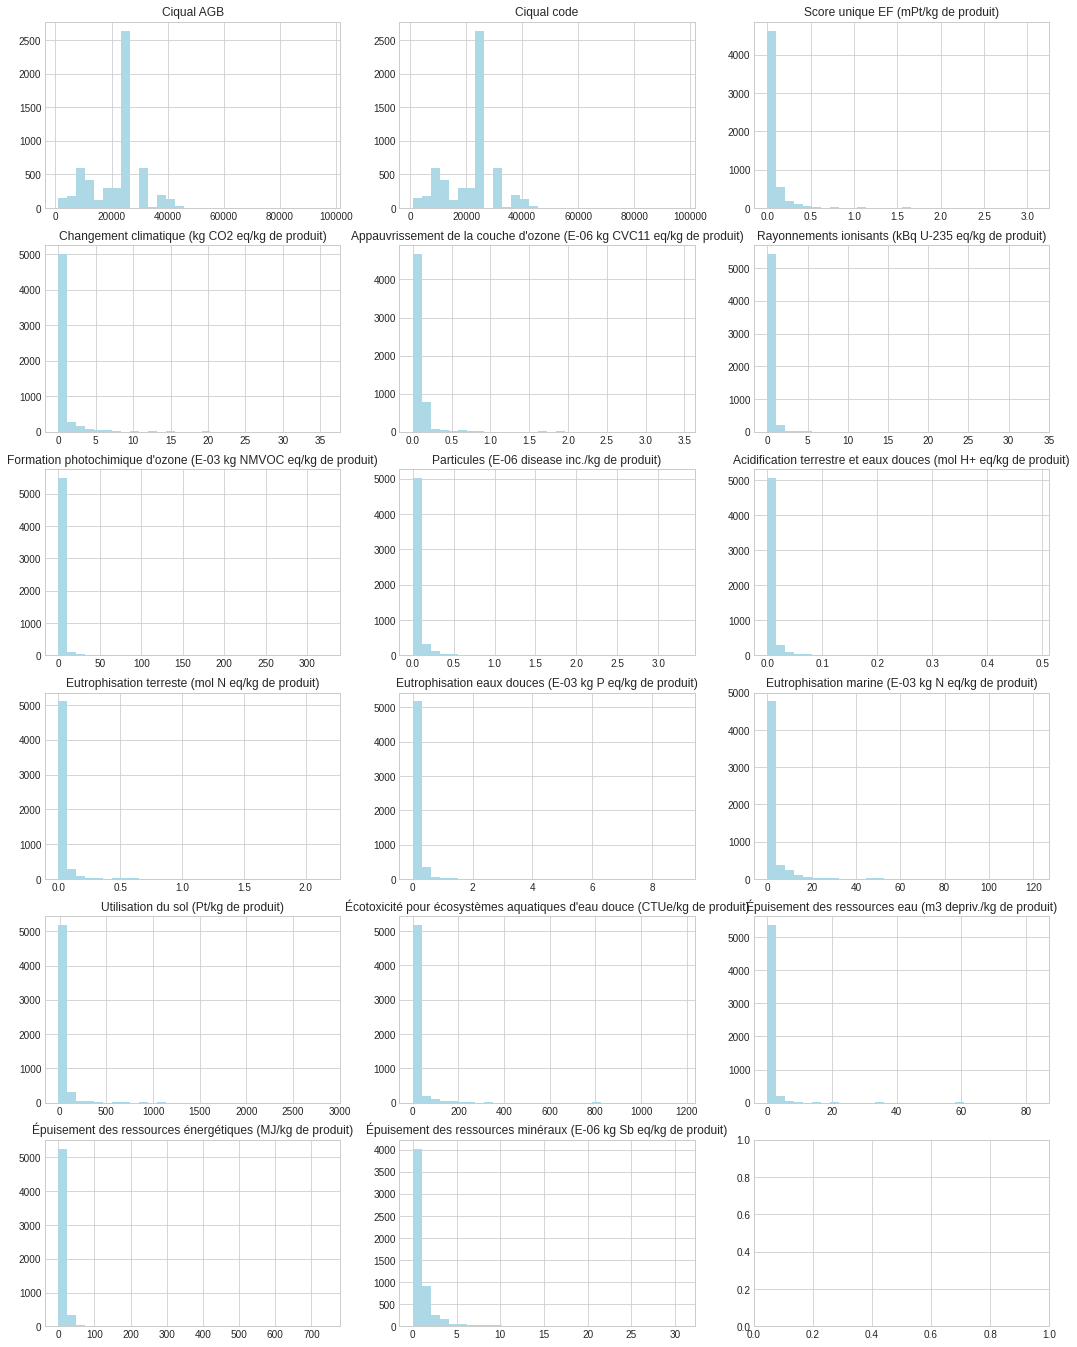

In [11]:
view(data_ingredient_numbers, bins=30)

In [12]:
columns = ['Nom Français', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'LCI Name', 'Ingredients']

In [13]:
print(f'{columns[0]} : {len(data_ingredient[columns[0]].unique())} uniques')
print(data_ingredient[columns[0]].unique())

Nom Français : 1038 uniques
['Sauce aïoli, préemballée' 'Gâteau aux amandes type financier'
 "Pâte d'amande, préemballée" ...
 'Yaourt au lait de chèvre, nature, 5% MG environ'
 'Yaourt à la grecque, sur lit de fruits' 'Yaourt à la grecque, nature']


In [14]:
print(f'{columns[1]} : {len(data_ingredient[columns[1]].unique())} uniques')
print(data_ingredient[columns[1]].unique())

Groupe d'aliment : 11 uniques
['aides culinaires et ingrédients divers' 'produits céréaliers'
 'fruits, légumes, légumineuses et oléagineux' 'viandes, œufs, poissons'
 'aliments infantiles' 'glaces et sorbets' 'entrées et plats composés'
 'boissons' 'matières grasses' 'produits sucrés'
 'lait et produits laitiers']


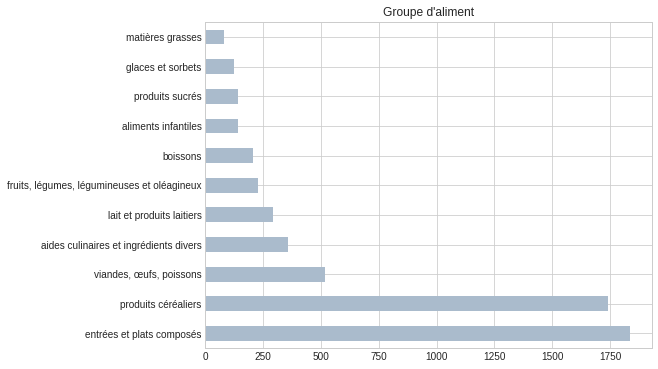

In [15]:
plt.figure(figsize=(8, 6))
plt.title(columns[1])
data_ingredient[columns[1]].value_counts().plot.barh(color='#abc')
plt.show()

In [16]:
print(f'{columns[2]} : {len(data_ingredient[columns[2]].unique())} uniques')
print(data_ingredient[columns[2]].unique())

Sous-groupe d'aliment : 44 uniques
['sauces' 'gâteaux et pâtisseries'
 'fruits à coque et graines oléagineuses'
 'produits à base de poissons et produits de la mer' 'fruits'
 'pains et viennoiseries' 'aides culinaires' 'pâtes, riz et céréales'
 'desserts infantiles' 'petits pots salés et plats infantiles'
 'desserts glacés' 'feuilletées et autres entrées' 'plats composés'
 'autres produits à base de viande'
 'céréales de petit-déjeuner et biscuits'
 'céréales et biscuits infantiles' 'charcuteries' 'boisson alcoolisées'
 'margarines' 'soupes' 'pizzas, tartes et crêpes salées'
 'salades composées et crudités' 'sandwichs' 'confiseries non chocolatées'
 'produits laitiers frais et assimilés'
 'chocolats et produits à base de chocolat' 'boissons sans alcool'
 'huiles et graisses végétales' 'ingrédients divers'
 'laits et boissons infantiles' 'pommes de terre et autres tubercules'
 'légumes' 'confitures et assimilés' 'œufs' 'glaces' 'sorbets'
 'farines et pâtes à tarte'
 'denrées destinées à

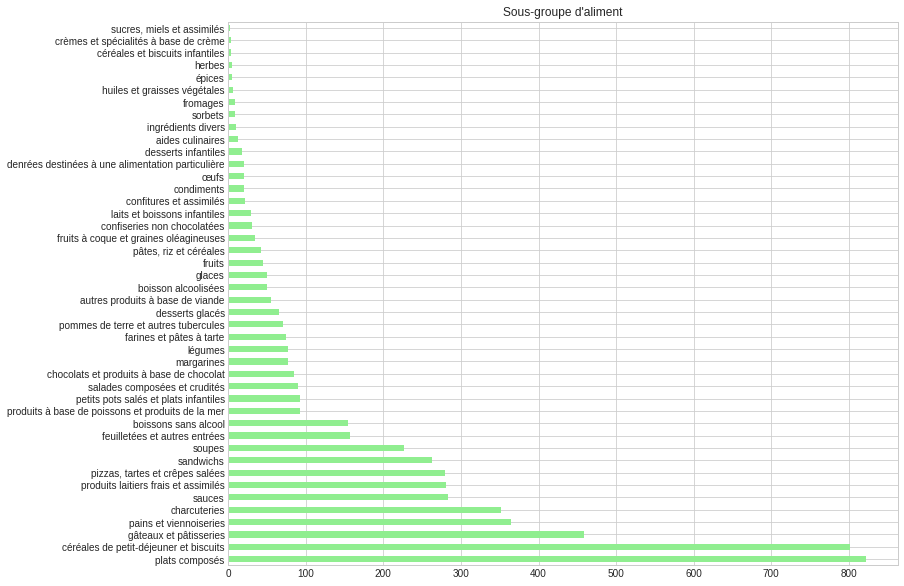

In [17]:
plt.figure(figsize=(12, 10))
plt.title(columns[2])
data_ingredient[columns[2]].value_counts().plot.barh(color='lightgreen')
plt.show()

In [18]:
print(f'{columns[3]} : {len(data_ingredient[columns[3]].unique())} uniques')
print(data_ingredient[columns[3]].unique())

LCI Name : 1036 uniques
['Aioli sauce (garlic and olive oil mayonnaise), prepacked' 'Almond cake'
 'Almond paste or marzipan, prepacked' ...
 "Yogurt, goat's milk, plain, around 5% fat"
 'Yogurt, Greek-style, on a bed of fruits' 'Yogurt, Greek-style, plain']


In [19]:
print(f'{columns[4]} : {len(data_ingredient[columns[4]].unique())} uniques')
print(data_ingredient[columns[4]].unique())

Ingredients : 213 uniques
["Jaune d'œuf" 'Ail' 'Jus de citron' "Huile d'olive" 'Autres étapes'
 'Amande' 'Beurre' "Blanc d'oeuf" 'Farine de blé' 'Sucre blanc'
 'Huile de poisson' 'Anchois' 'Sel' 'Huile de tournesol' 'Pomme de table'
 'Œuf de poule' 'Fromage frais crémeux' 'Poire' 'Abricot' 'Carotte'
 'Poireau' 'Oignons' 'Navet' 'Courgette' 'Lait demi-écremé'
 "Huile combinée (mélange d'huile d'olive et d'huile de graines)" 'Miel'
 'Vanille' 'Cassonade' 'Moutarde' 'Vin rouge' 'Sauce soja' 'Tomate'
 'Piment' 'Poivre' 'Échalote' 'Estragon' 'Vin blanc' 'Coriandre' 'Blé dur'
 'Bœuf haché' 'Viande de bœuf sans os' 'Champignon' 'Persil' 'Fraise'
 'Chocolat noir' 'Poudre de cacao' 'Lait' 'Abats de bœuf'
 'Graisse végétale (type margarine)' 'Groseille' "Boisson à base d'avoine"
 'Léthicine de soja' 'Céleri' 'Bouillon' 'Emmental' 'Pâtes' 'Son de blé'
 'Farine de seigle' 'Graine de lin' 'Graine de sésame' 'Amidon de maïs'
 'Farine de riz' 'Chicorée' 'Chocolat au lait' 'Viande' 'Abats de porc'
 'P

### Dataset de synthèse

In [20]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de p

In [21]:
data_synthese_numbers = data_synthese.copy()
columns = [ 'Code AGB', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 
            'Nom du Produit en Français', 'LCI Name', 'Saisonnalité', 
            'Livraison', 'Matériau d\'emballage', 'Préparation']
for column in columns:
    del data_synthese_numbers[column]
data_synthese_numbers.describe()

Code CIQUAL  Transport par avion (1 : par avion)  \
count   2479.000000                          2479.000000   
mean   22446.076240                             0.000807   
std    14034.948243                             0.028398   
min     1000.000000                             0.000000   
25%    12759.500000                             0.000000   
50%    20511.000000                             0.000000   
75%    26105.000000                             0.000000   
max    96778.000000                             1.000000   

       DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)  \
count                                        2479.000000                   
mean                                            2.810097                   
std                                             0.542470                   
min                                             1.600000                   
25%                                             2.430000                   
50%                                             2.760000                   
75%                                             3.110000                   
max                                             4.870000                   

       Score unique EF (mPt/kg de produit)  \
count                          2479.000000   
mean                              0.712264   
std                               0.885750   
min                               0.006130   
25%                               0.168917   
50%                               0.394124   
75%                               0.867402   
max                               6.085768   

       Changement climatique (kg CO2 eq/kg de produit)  \
count                                      2479.000000   
mean                                          5.909752   
std                                           9.138402   
min                                           0.021047   
25%                                           1.086875   
50%                                           2.718176   
75%                                           6.289730   
max                                          62.729303   

       Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)  \
count                                        2479.000000                       
mean                                            0.572436                       
std                                             4.913065                       
min                                             0.008919                       
25%                                             0.160290                       
50%                                             0.261981                       
75%                                             0.540185                       
max                                           243.449330                       

       Rayonnements ionisants (kBq U-235 eq/kg de produit)  \
count                                        2479.000000     
mean                                            1.239127     
std                                             1.898260     
min                                             0.040985     
25%                                             0.448390     
50%                                             0.821225     
75%                                             1.352461     
max                                            33.548897     

       Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)  \
count                                        2479.000000                  
mean                                           21.503554                  
std                                            42.971933                  
min                                             0.061076                  
25%                                             3.610219                  
50%                                             8.112630                  
75%                                    

In [22]:
view(data_synthese_numbers, bins=30)

In [23]:
print(f'{columns[0]} : {len(data_synthese[columns[0]].unique())} uniques')
print(data_synthese[columns[0]].unique())

Code AGB : 2479 uniques
['13712' '13713' '13714' ... '19594' '19598' '19599']


In [24]:
print(f'{columns[1]} : {len(data_synthese[columns[1]].unique())} uniques')
print(data_synthese[columns[1]].unique())

Groupe d'aliment : 11 uniques
['fruits, légumes, légumineuses et oléagineux' 'viandes, œufs, poissons'
 'aides culinaires et ingrédients divers' 'boissons'
 'entrées et plats composés' 'produits céréaliers'
 'lait et produits laitiers' 'produits sucrés' 'glaces et sorbets'
 'matières grasses' 'aliments infantiles']


In [25]:
print(f'{columns[2]} : {len(data_synthese[columns[2]].unique())} uniques')
print(data_synthese[columns[2]].unique())

Sous-groupe d'aliment : 58 uniques
['fruits' 'produits à base de poissons et produits de la mer' 'algues'
 'viandes cuites' 'viandes crues' 'herbes' 'boisson alcoolisées'
 'plats composés' 'fruits à coque et graines oléagineuses'
 'pâtes, riz et céréales' 'farines et pâtes à tarte' 'poissons crus'
 'charcuteries' 'légumes' 'fromages' 'gâteaux et pâtisseries'
 'pains et viennoiseries' 'pommes de terre et autres tubercules'
 'poissons cuits' 'chocolats et produits à base de chocolat'
 'céréales de petit-déjeuner et biscuits' 'glaces' 'ingrédients divers'
 'feuilletées et autres entrées' 'beurres' 'huiles et graisses végétales'
 'céréales et biscuits infantiles' 'autres produits à base de viande'
 'boissons sans alcool' 'laits et boissons infantiles'
 'produits laitiers frais et assimilés' 'confiseries non chocolatées'
 'soupes' 'desserts glacés' 'sandwichs' 'pizzas, tartes et crêpes salées'
 'mollusques et crustacés cuits' 'mollusques et crustacés crus' 'épices'
 'salades composées et cr

In [26]:
print(f'{columns[3]} : {len(data_synthese[columns[3]].unique())} uniques')
print(data_synthese[columns[3]].unique())

Nom du Produit en Français : 2479 uniques
['Abricot au sirop léger, appertisé, égoutté'
 'Abricot au sirop léger, appertisé, non égoutté'
 'Abricot au sirop, appertisé, égoutté' ...
 'Yaourt, lait fermenté ou spécialité laitière, nature, 0% MG'
 'Yaourt, lait fermenté ou spécialité laitière, nature, à la crème'
 'Yaourt, lait fermenté ou spécialité laitière, nature, sucré']


In [27]:
print(f'{columns[4]} : {len(data_synthese[columns[4]].unique())} uniques')
print(data_synthese[columns[4]].unique())

LCI Name : 2477 uniques
['Apricot, canned in light syrup, drained'
 'Apricot, canned in light syrup, not drained'
 'Apricot, in syrup, canned, drained' ...
 'Yogurt, fermented milk or dairy specialty, plain, fat free'
 'Yogurt, fermented milk or dairy specialty, plain, w cream'
 'Yogurt, fermented milk or dairy specialty, plain, w sugar']


In [28]:
print(f'{columns[5]} : {len(data_synthese[columns[5]].unique())} uniques')
print(data_synthese[columns[5]].unique())

Saisonnalité : 3 uniques
['mix de consommation FR' 'de saison' 'hors saison']


In [29]:
plt.figure(figsize=(6, 5))
plt.title(columns[5])
data_synthese[columns[5]].value_counts().plot.barh(color='royalblue')
plt.show()

In [30]:
print(f'{columns[6]} : {len(data_synthese[columns[6]].unique())} uniques')
print(data_synthese[columns[6]].unique())

Livraison : 5 uniques
['Ambiant (moyenne)' 'Glacé' 'Ambiant (long)' 'Congelé' 'Ambiant (court)']


In [31]:
plt.figure(figsize=(6, 5))
plt.title(columns[6])
data_synthese[columns[6]].value_counts().plot.barh(color='orange')
plt.show()

In [32]:
print(f'{columns[7]} : {len(data_synthese[columns[7]].unique())} uniques')
print(data_synthese[columns[7]].unique())

Matériau d'emballage : 19 uniques
['Acier' 'LPDE' 'PS' 'Verre' "Pas d'emballage" 'PP' 'Carton' 'Papier'
 'V (PVC)' 'Bouteille PET' 'Déjà emballé - PET' 'Bouteille PETE' 'HPDE'
 'Déjà emballé - PP/PE' 'Déjà emballé - Verre' 'Aluminium'
 'Déjà emballé - LDPE' 'PVC' 'Déjà emballé - Aluminium']


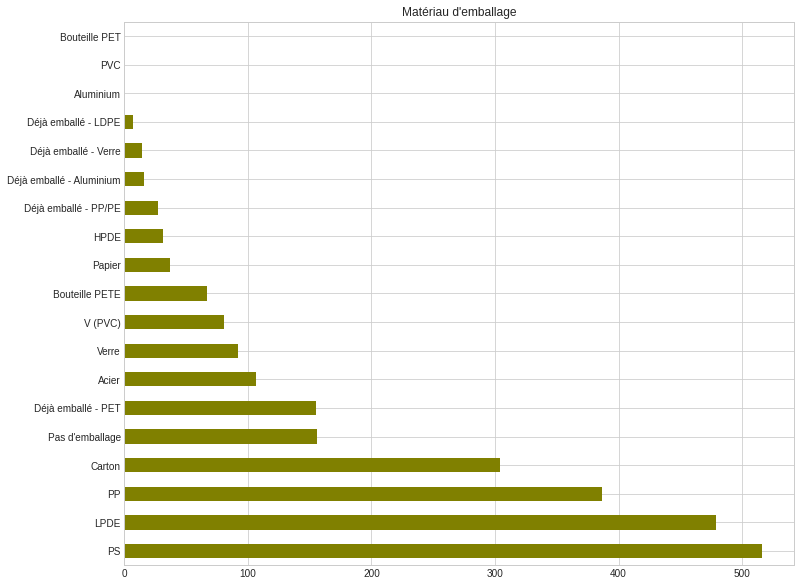

In [33]:
plt.figure(figsize=(12, 10))
plt.title(columns[7])
data_synthese[columns[7]].value_counts().plot.barh(color='olive')
plt.show()

In [34]:
print(f'{columns[8]} : {len(data_synthese[columns[8]].unique())} uniques')
print(data_synthese[columns[8]].unique())

Préparation : 11 uniques
['Pas de préparation ' 'Pas de préparation' 'Four' 'Poêle'
 'Réfrigéré chez le consommateur' 'Micro onde ' 'Four ' 'Micro onde'
 "Cuisson à l'eau" 'Bouilli' 'Friture']


In [35]:
data_synthese[data_synthese['Préparation'] == 'Four '] = 'Four'
data_synthese[data_synthese['Préparation'] == 'Pas de préparation '] = 'Pas de préparation'
print(f'{columns[8]} : {len(data_synthese[columns[8]].unique())} uniques')
print(data_synthese[columns[8]].unique())

Préparation : 9 uniques
['Pas de préparation' 'Four' 'Poêle' 'Réfrigéré chez le consommateur'
 'Micro onde ' 'Micro onde' "Cuisson à l'eau" 'Bouilli' 'Friture']


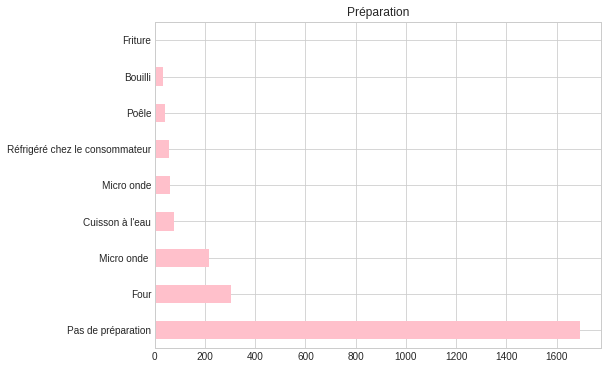

In [36]:
plt.figure(figsize=(8, 6))
plt.title(columns[8])
data_synthese[columns[8]].value_counts().plot.barh(color='pink')
plt.show()

### Dataset des étapes

In [37]:
data_etape.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'DQR', 'Nom et code',
       'Score unique EF (mPt / kg de produit) - Agriculture',
       'Score unique EF (mPt / kg de produit) - Transformation',
       ...
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation',
       'DQR - P', 'DQR - TiR', 'DQR - GR', 'DQR - TeR'],
      dtype='object', length=102)

In [38]:
data_etape_numbers = data_etape.copy()
columns = ['Code AGB', 'Code CIQUAL', 'Groupe d\'aliment', 'Sous-groupe d\'aliment',
           'Nom du Produit en Français', 'LCI Name', 'Nom et code']
for column in columns:
    del data_etape_numbers[column]
data_etape_numbers.describe()

DQR  Score unique EF (mPt / kg de produit) - Agriculture  \
count  2480.000000                                        2480.000000     
mean      2.809867                                           0.596392     
std       0.542481                                           0.858677     
min       1.600000                                           0.000000     
25%       2.430000                                           0.089788     
50%       2.760000                                           0.274276     
75%       3.110000                                           0.702145     
max       4.870000                                           5.979301     

       Score unique EF (mPt / kg de produit) - Transformation  \
count                                        2480.000000        
mean                                            0.050175        
std                                             0.094908        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.033888        
75%                                             0.056234        
max                                             1.802873        

       Score unique EF (mPt / kg de produit) - Emballage  \
count                                        2480.000000   
mean                                            0.022243   
std                                             0.018754   
min                                             0.000000   
25%                                             0.016119   
50%                                             0.019502   
75%                                             0.022106   
max                                             0.221301   

       Score unique EF (mPt / kg de produit) - Transport  \
count                                        2480.000000   
mean                                            0.024483   
std                                             0.034569   
min                                             0.000228   
25%                                             0.013755   
50%                                             0.017224   
75%                                             0.021994   
max                                             1.041045   

       Score unique EF (mPt / kg de produit) - Supermarché et distribution  \
count                                        2480.000000                     
mean                                            0.010914                     
std                                             0.007413                     
min                                             0.000044                     
25%                                             0.008827                     
50%                                             0.008979                     
75%                                             0.011180                     
max                                             0.063884                     

       Score unique EF (mPt / kg de produit) - Consommation  \
count                                        2480.000000      
mean                                            0.008202      
std                                             0.012901      
min                                             0.000000      
25%                                             0.000347      
50%                                             0.002429      
75%                                             0.007256      
max                                             0.142275      

       Changement climatique (kg CO2 eq/kg de produit) - Agriculture  \
count                                        2480.000000               
mean                                            4.974590               
std                                             9.024005               
min                                            -0.248977               
25%                                     

In [39]:
view(data_etape_numbers, bins=30)

In [40]:
print(f'{columns[0]} : {len(data_etape[columns[0]].unique())} uniques')
print(data_etape[columns[0]].unique())

Code AGB : 2480 uniques
['12112' '13712' '13713' ... '19594' '19598' '19599']


In [41]:
print(f'{columns[1]} : {len(data_etape[columns[1]].unique())} uniques')
print(data_etape[columns[1]].unique())

Code CIQUAL : 2474 uniques
[12112 13712 13713 ... 19594 19598 19599]


In [42]:
print(f'{columns[2]} : {len(data_etape[columns[2]].unique())} uniques')
print(data_etape[columns[2]].unique())

Groupe d'aliment : 11 uniques
['lait et produits laitiers' 'fruits, légumes, légumineuses et oléagineux'
 'viandes, œufs, poissons' 'aides culinaires et ingrédients divers'
 'boissons' 'entrées et plats composés' 'produits céréaliers'
 'produits sucrés' 'glaces et sorbets' 'matières grasses'
 'aliments infantiles']


In [43]:
print(f'{columns[3]} : {len(data_etape[columns[3]].unique())} uniques')
print(data_etape[columns[3]].unique())

Sous-groupe d'aliment : 58 uniques
['fromages' 'fruits' 'produits à base de poissons et produits de la mer'
 'algues' 'viandes cuites' 'viandes crues' 'herbes' 'boisson alcoolisées'
 'plats composés' 'fruits à coque et graines oléagineuses'
 'pâtes, riz et céréales' 'farines et pâtes à tarte' 'poissons crus'
 'charcuteries' 'légumes' 'gâteaux et pâtisseries'
 'pains et viennoiseries' 'pommes de terre et autres tubercules'
 'poissons cuits' 'chocolats et produits à base de chocolat'
 'céréales de petit-déjeuner et biscuits' 'glaces' 'ingrédients divers'
 'feuilletées et autres entrées' 'beurres' 'huiles et graisses végétales'
 'céréales et biscuits infantiles' 'autres produits à base de viande'
 'boissons sans alcool' 'laits et boissons infantiles'
 'produits laitiers frais et assimilés' 'confiseries non chocolatées'
 'soupes' 'desserts glacés' 'sandwichs' 'pizzas, tartes et crêpes salées'
 'mollusques et crustacés cuits' 'mollusques et crustacés crus' 'épices'
 'salades composées et cr

In [44]:
print(f'{columns[4]} : {len(data_etape[columns[4]].unique())} uniques')
print(data_etape[columns[4]].unique())

Nom du Produit en Français : 2480 uniques
['Abondance' 'Abricot au sirop léger, appertisé, égoutté'
 'Abricot au sirop léger, appertisé, non égoutté' ...
 'Yaourt, lait fermenté ou spécialité laitière, nature, 0% MG'
 'Yaourt, lait fermenté ou spécialité laitière, nature, à la crème'
 'Yaourt, lait fermenté ou spécialité laitière, nature, sucré']


In [45]:
print(f'{columns[5]} : {len(data_etape[columns[5]].unique())} uniques')
print(data_etape[columns[5]].unique())

LCI Name : 2478 uniques
["Abondance cheese, from cow's milk"
 'Apricot, canned in light syrup, drained'
 'Apricot, canned in light syrup, not drained' ...
 'Yogurt, fermented milk or dairy specialty, plain, fat free'
 'Yogurt, fermented milk or dairy specialty, plain, w cream'
 'Yogurt, fermented milk or dairy specialty, plain, w sugar']


In [46]:
print(f'{columns[6]} : {len(data_etape[columns[6]].unique())} uniques')
print(data_etape[columns[6]].unique())

Nom et code : 2480 uniques
['Abondance (12112)' 'Abricot au sirop léger, appertisé, égoutté (13712)'
 'Abricot au sirop léger, appertisé, non égoutté (13713)' ...
 'Yaourt, lait fermenté ou spécialité laitière, nature, 0% MG (19594)'
 'Yaourt, lait fermenté ou spécialité laitière, nature, à la crème (19598)'
 'Yaourt, lait fermenté ou spécialité laitière, nature, sucré (19599)']


## Expérimentations

Maintenant que nous connaissons un peu plus en détails le contenu de nos données, nous allons mener différentes expérimentations d'apprentissages supervisés et d'apprentissages non supervisés.

### Prédiction du groupe d'aliments des ingrédients

Nous allons commencer par quelque chose de simple. Nous allons utiliser nos classifieurs afin de prédire pour chaque ingrédient du dataset `data_ingredient` la target `Groupe d'aliment`.

Il s'agit ici d'une classification multiclasse. On dispose de 11 groupes différents d'aliments.

In [47]:
target = data_ingredient['Groupe d\'aliment'].unique()
print(target)
print('Nombre de classes :', target.size)

['aides culinaires et ingrédients divers' 'produits céréaliers'
 'fruits, légumes, légumineuses et oléagineux' 'viandes, œufs, poissons'
 'aliments infantiles' 'glaces et sorbets' 'entrées et plats composés'
 'boissons' 'matières grasses' 'produits sucrés'
 'lait et produits laitiers']
Nombre de classes : 11


Dans un premier temps, dans notre base d'apprentissage, nous allons nous intéresser uniquement aux attributs numériques de notre dataset. Nous allons ignorer les attributs des différents codes que nous estimons non pertinents. Pour finir, nous allons standardiser le dataset.

In [48]:
del data_ingredient_numbers['Ciqual AGB']
del data_ingredient_numbers['Ciqual code']
data_ingredient_numbers.columns

Index(['Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources énergétiques (MJ/kg de produit)',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)'],
      dtype='object')

In [49]:
X = clust.normalisation(data_ingredient_numbers)
X = np.array(X)
X

array([[0.01283137, 0.00477542, 0.00407144, ..., 0.00407113, 0.00198711,
        0.00818225],
       [0.00142616, 0.00050458, 0.00072594, ..., 0.00350995, 0.00030965,
        0.0027353 ],
       [0.00625547, 0.00189151, 0.00226618, ..., 0.01742839, 0.00106909,
        0.00663935],
       ...,
       [0.02037268, 0.01951741, 0.00296884, ..., 0.00016771, 0.00143081,
        0.00062611],
       [0.03435505, 0.03356623, 0.00917411, ..., 0.00450419, 0.00413936,
        0.02092227],
       [0.02269865, 0.01549237, 0.03345124, ..., 0.00300005, 0.02910248,
        0.03828302]])

In [50]:
namedY = data_ingredient['Groupe d\'aliment']
Y = np.zeros_like(namedY)
for i, t in enumerate(target): Y[np.where(namedY == t)[0]] = i
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

**Visualisation des données**

In [51]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

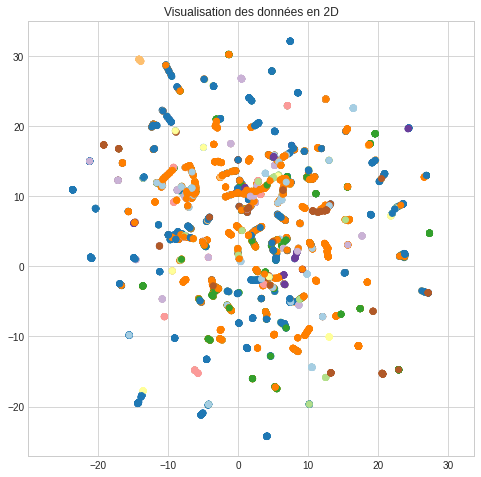

In [52]:
plt.figure(figsize=(8, 8))
plt.title('Visualisation des données en 2D')
plt.scatter(embedding[:, 0], embedding[:, 1], c=Y, cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

In [53]:
dim = X.shape[1]
dim

15

#### Groupes d'ingrédients : KNN

Nous allons utiliser le classifier `KNN` afin de prédire la classe de chaque ingrédient. Ensuite, par validation croisée, nous allons observer la performance de notre classifieur.

In [54]:
permut = np.random.permutation(np.arange(Y.size))
X_permut = X[permut]
Y_permut = Y[permut]
Y_permut

array([6, 1, 6, ..., 1, 0, 6], dtype=object)

In [55]:
n = 10
knn = cl.ClassifierKNN_MC(dim, 5, 11)
Acc_A = []
Acc_T = []
for i in range(n):
    X_A, Y_A, X_T, Y_T = ut.crossval_strat(X_permut, Y_permut, n, i)
    trained = copy.deepcopy(knn)
    trained.train(X_A, Y_A)
    Acc_A.append(trained.accuracy(X_A, Y_A))
    Acc_T.append(trained.accuracy(X_T, Y_T))

In [56]:
print('Performances en apprentissage :', Acc_A)
print('Moyenne et variance :', ut.analyse_perfs(Acc_A))

Performances en apprentissage : [0.8083773732628694, 0.8030925817185359, 0.8025053826580544, 0.8052456449403014, 0.8083773732628694, 0.806224310041104, 0.806615776081425, 0.8097475044039929, 0.8070072421217459, 0.8028968486983754]
Moyenne et variance : (0.8060090037189275, 5.7654848706113855e-06)


In [57]:
print('Performances en test :', Acc_T)
print('Moyenne et variance :', ut.analyse_perfs(Acc_T))

Performances en test : [0.7241992882562278, 0.7704626334519573, 0.7473309608540926, 0.7384341637010676, 0.7206405693950177, 0.7526690391459074, 0.7206405693950177, 0.7437722419928826, 0.6903914590747331, 0.7224199288256228]
Moyenne et variance : (0.7330960854092526, 0.0004451564696495741)


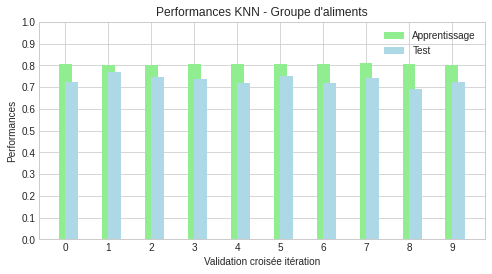

In [58]:
plt.figure(figsize=(8, 4))
plt.title('Performances KNN - Groupe d\'aliments')
plt.bar(range(n), Acc_A, width=0.3, color='lightgreen', align='center', label='Apprentissage')
plt.bar(range(n), Acc_T, width=0.3, color='lightblue', align='edge', label='Test')
plt.xticks(range(n))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Validation croisée itération')
plt.ylabel('Performances')
plt.legend()
plt.show()

#### Groupes des ingrédients : Arbres de décision numérique

In [59]:
n = 10
arbre = cl.ClassifierArbreNumerique(dim, .0, data_ingredient_numbers.columns)
Acc_A = []
Acc_T = []
for i in range(n):
    X_A, Y_A, X_T, Y_T = ut.crossval_strat(X_permut, Y_permut, n, i)
    trained = copy.deepcopy(arbre)
    trained.train(X_A, Y_A)
    Acc_A.append(trained.accuracy(X_A, Y_A))
    Acc_T.append(trained.accuracy(X_T, Y_T))

In [60]:
print('Performances en apprentissage :', Acc_A)
print('Moyenne et variance :', ut.analyse_perfs(Acc_A))

Performances en apprentissage : [0.9810138970444314, 0.9816010961049129, 0.9816010961049129, 0.9819925621452339, 0.9829712272460364, 0.9831669602661969, 0.982775494225876, 0.9819925621452339, 0.9831669602661969, 0.982775494225876]
Moyenne et variance : (0.9823057349774906, 5.225677030708973e-07)


In [61]:
print('Performances en test :', Acc_T)
print('Moyenne et variance :', ut.analyse_perfs(Acc_T))

Performances en test : [0.7829181494661922, 0.8096085409252669, 0.7686832740213523, 0.8167259786476868, 0.791814946619217, 0.8220640569395018, 0.7900355871886121, 0.7953736654804271, 0.7758007117437722, 0.7669039145907474]
Moyenne et variance : (0.7919928825622776, 0.0003358936690264816)


In [62]:
plt.figure(figsize=(8, 4))
plt.title('Performances Arbre de décision - Groupe d\'aliments')
plt.bar(range(n), Acc_A, width=0.3, color='lightgreen', align='center', label='Apprentissage')
plt.bar(range(n), Acc_T, width=0.3, color='lightblue', align='edge', label='Test')
plt.xticks(range(n))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Validation croisée itération')
plt.ylabel('Performances')
plt.legend()
plt.show()

**Note :** Les performances de nos classifieurs sont assez bonnes, en entrainement et en test ; elles sont généralement supérieure à 75%. En d'autres termes, en connaissant différents indicateurs d'impacts environnementaux des différents ingrédients, il est possible de prédire le groupe auquel cet ingrédient appartient.

La colonne `Score unique EF (mPt/kg de produit)` donne en effet un score pondéré des indicateurs d'impacts de chacun des produits.

<Figure size 576x432 with 0 Axes>

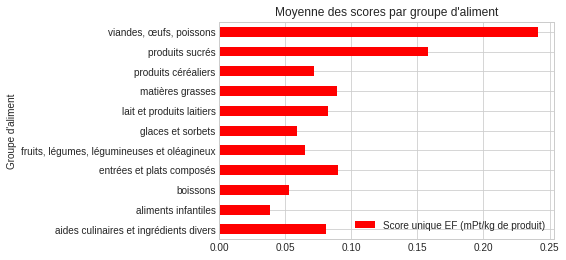

In [63]:
group_score = data_ingredient[['Groupe d\'aliment', 'Score unique EF (mPt/kg de produit)']]
plt.figure(figsize=(8, 6))
group_score.groupby('Groupe d\'aliment').mean().plot.barh(color='red', label='Moyenne')
plt.title('Moyenne des scores par groupe d\'aliment')
plt.show()

### Prédiction de note DQR

La note DQR indique la qualité des informations sur un exemple donné. Elle varie entre 1 et 5, tel qu'une note de 1 signifie que les informations données sont très exactes et qu'une note de 5 signifie que les informations ne sont pas certaines.

Nous allons utiliser nos classifieurs afin de prédire pour chaque exemple du dataset `data_synthese` la target `DQR`.

In [64]:
data_synthese['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'].unique()

array(['Pas de préparation', 2.44, 2.2, 2.64, 3.14, 2.99, 2.65, 2.63,
       4.11, 3.54, 3.29, 2.26, 3.19, 3.68, 3.16, 2.93, 2.68, 3.78, 3.1,
       3.57, 'Four', 2.81, 3.75, 2.48, 3.53, 2.78, 2.43, 3.08, 2.59, 2.95,
       2.24, 2.69, 2.53, 2.89, 2.14, 2.6, 3.0, 2.46, 2.96, 3.64, 3.52,
       3.28, 2.91, 3.45, 3.11, 3.24, 2.52, 2.13, 2.19, 2.27, 2.55, 2.98,
       3.65, 3.17, 2.97, 2.84, 3.07, 2.25, 2.72, 2.56, 3.38, 3.31, 2.54,
       2.29, 2.31, 2.03, 2.06, 1.99, 3.47, 3.56, 3.05, 3.02, 2.74, 3.04,
       2.92, 3.2, 3.27, 2.9, 3.61, 3.21, 2.77, 2.51, 2.35, 2.49, 3.39,
       2.42, 4.02, 3.06, 3.18, 3.01, 3.49, 3.63, 1.81, 2.47, 2.67, 3.12,
       3.37, 4.31, 2.15, 2.7, 3.74, 3.95, 2.5, 2.82, 2.32, 2.86, 2.66,
       3.71, 2.45, 2.8, 2.38, 3.89, 1.84, 1.96, 4.36, 2.39, 3.44, 1.97,
       3.34, 2.09, 2.75, 2.41, 2.61, 2.21, 2.36, 3.55, 2.04, 2.85, 3.43,
       3.48, 2.83, 1.78, 4.08, 1.9, 2.33, 3.62, 3.59, 1.93, 2.02, 1.75,
       4.87, 3.3, 3.46, 3.09, 2.57, 3.15, 3.73, 4.14, 3.35, 1

Dans notre dataset, valeur `DQR` est un réel compris entre 1 et 5. Nous constatons également que certains exemple ont une valeur abbérante de `DQR` qui n'est pas un nombre. 

Commençons par supprimer les exemples dont les valeurs de DQR sont abbérantes.

In [65]:
data_synthese2 = data_synthese[data_synthese['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'] != 'Pas de préparation']
data_synthese2 = data_synthese2[data_synthese2['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'] != 'Four']
print('Nombre de lignes supprimées :', len(data_synthese) - len(data_synthese2))
print('Nombre d exemples restants :', len(data_synthese2))
data_synthese2['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'].unique()

Nombre de lignes supprimées : 411
Nombre d exemples restants : 2068


array([2.44, 2.2, 2.64, 3.14, 2.99, 2.65, 2.63, 4.11, 3.54, 3.29, 2.26,
       3.19, 3.68, 3.16, 2.93, 2.68, 3.78, 3.1, 3.57, 2.81, 3.75, 2.48,
       3.53, 2.78, 2.43, 3.08, 2.59, 2.95, 2.24, 2.69, 2.53, 2.89, 2.14,
       2.6, 3.0, 2.46, 2.96, 3.64, 3.52, 3.28, 2.91, 3.45, 3.11, 3.24,
       2.52, 2.13, 2.19, 2.27, 2.55, 2.98, 3.65, 3.17, 2.97, 2.84, 3.07,
       2.25, 2.72, 2.56, 3.38, 3.31, 2.54, 2.29, 2.31, 2.03, 2.06, 1.99,
       3.47, 3.56, 3.05, 3.02, 2.74, 3.04, 2.92, 3.2, 3.27, 2.9, 3.61,
       3.21, 2.77, 2.51, 2.35, 2.49, 3.39, 2.42, 4.02, 3.06, 3.18, 3.01,
       3.49, 3.63, 1.81, 2.47, 2.67, 3.12, 3.37, 4.31, 2.15, 2.7, 3.74,
       3.95, 2.5, 2.82, 2.32, 2.86, 2.66, 3.71, 2.45, 2.8, 2.38, 3.89,
       1.84, 1.96, 4.36, 2.39, 3.44, 1.97, 3.34, 2.09, 2.75, 2.41, 2.61,
       2.21, 2.36, 3.55, 2.04, 2.85, 3.43, 3.48, 2.83, 1.78, 4.08, 1.9,
       2.33, 3.62, 3.59, 1.93, 2.02, 1.75, 4.87, 3.3, 3.46, 3.09, 2.57,
       3.15, 3.73, 4.14, 3.35, 1.76, 4.3, 4.25, 1.87, 3.58, 2.

In [66]:
columns = ['Code AGB', 'Code CIQUAL', 'Groupe d\'aliment', 'Sous-groupe d\'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d\'emballage', 'Préparation']
data_synthese2 = data_synthese2.drop(columns, axis=1)
data_synthese2.columns

Index(['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources énergétiques (MJ/kg de produit)',
       'Épuisement de

Les valeurs de DQR sont réelles. Pour notre cas, nous ne souhaitons pas effectuer ici de régression linéaire, mais une classification multi-classe.
Nous allons donc rendre entières nos valeurs de DQR en découpant les différentes classes par 5 intervalles égaux.

1.6 4.87


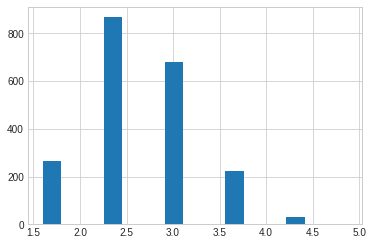

In [67]:
Y_float = np.array(data_synthese2['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'])
print(min(Y_float), max(Y_float))
plt.hist(Y_float, bins=5, width=0.2)
plt.show()

In [68]:
v = np.linspace(min(Y_float), max(Y_float), 6)
Y = Y_float.copy()
Y[(Y >= v[0])&(Y < v[1])] = 0
Y[(Y >= v[1])&(Y < v[2])] = 1
Y[(Y >= v[2])&(Y < v[3])] = 2
Y[(Y >= v[3])&(Y < v[4])] = 3
Y[(Y >= v[4])&(Y <= v[5])] = 4
np.unique(Y)

array([0, 1, 2, 3, 4], dtype=object)

In [69]:
X = data_synthese2.drop('DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)', axis=1)
X = np.array(clust.normalisation(X))
print(X.shape)
X

(2068, 15)


array([[0.020052707040150476, 0.009427587722134959,
        0.0005954631106094074, ..., 0.033565470834079326,
        0.03646791824346804, 0.006634976338759023],
       [0.018553532243622096, 0.013406258384834873,
        0.0003316783559876065, ..., 0.034404568595587916,
        0.020112873631342194, 0.007987143083011537],
       [0.13011249259374053, 0.041981516304825495, 0.003516103188287931,
        ..., 0.04756659538461617, 0.2433063039527543,
        0.042188299540643376],
       ...,
       [0.0384371784109133, 0.03860140797126703, 0.0006114672735538008,
        ..., 0.03278373382240409, 0.03160269543190466,
        0.0066902005857821705],
       [0.04184022315467356, 0.041999968420490155, 0.0006968841521266868,
        ..., 0.0332551887212846, 0.033455018070090235,
        0.010638883542381516],
       [0.02878554612677367, 0.02764920104415135, 0.0005766059291459465,
        ..., 0.03299513481774174, 0.03052368207042485,
        0.006847872537018714]], dtype=object)

**Visualisation des données**

In [70]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

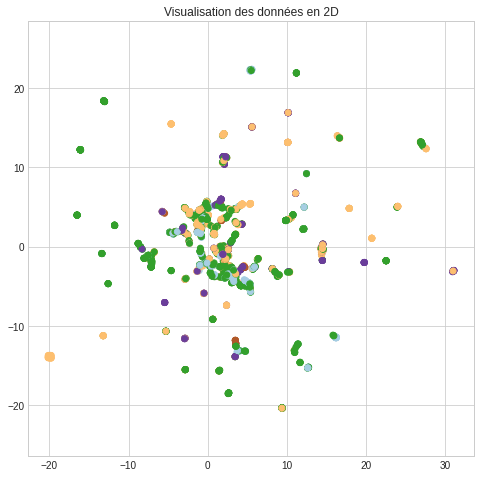

In [71]:
plt.figure(figsize=(8, 8))
plt.title('Visualisation des données en 2D')
plt.scatter(embedding[:, 0], embedding[:, 1], c=Y, cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

In [72]:
dim = X.shape[1]
dim

15

In [73]:
permut = np.random.permutation(np.arange(Y.size))
X_permut = X[permut]
Y_permut = Y[permut]
Y_permut

array([2, 2, 3, ..., 1, 1, 1], dtype=object)

#### DQR : Random Forest

In [74]:
forest = cl.ClassifierRandomForest(21, dim//2, .5)

In [75]:
%%time
Acc_A = []
Acc_T = []
for i in range(10):
    X_A, Y_A, X_T, Y_T = ut.crossval_strat(X_permut, Y_permut, n, i)
    trained = copy.deepcopy(forest)
    trained.train(X_A, Y_A)
    Acc_A.append(trained.accuracy(X_A, Y_A))
    Acc_T.append(trained.accuracy(X_T, Y_T))

CPU times: user 34min 49s, sys: 7.48 s, total: 34min 56s
Wall time: 34min 58s


In [76]:
print('Performance en apprentissage :', Acc_A)
print('Moyenne et variance :', ut.analyse_perfs(Acc_A))

Performance en apprentissage : [0.9136266094420601, 0.9114806866952789, 0.907725321888412, 0.9104077253218884, 0.9093347639484979, 0.9146995708154506, 0.9050429184549357, 0.8975321888412017, 0.9141630901287554, 0.9141630901287554]
Moyenne et variance : (0.9098175965665238, 2.575625356886302e-05)


In [77]:
print('Performance en apprentissage :', Acc_T)
print('Moyenne et variance :', ut.analyse_perfs(Acc_T))

Performance en apprentissage : [0.7205882352941176, 0.75, 0.7549019607843137, 0.7401960784313726, 0.7156862745098039, 0.7205882352941176, 0.7549019607843137, 0.7107843137254902, 0.7549019607843137, 0.6764705882352942]
Moyenne et variance : (0.7299019607843138, 0.0005980872741253357)


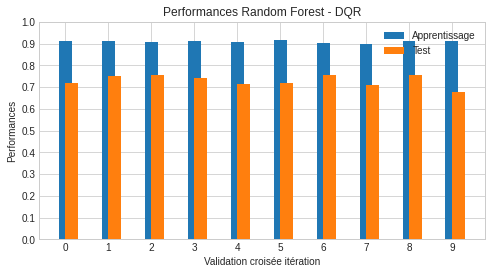

In [78]:
plt.figure(figsize=(8, 4))
plt.title('Performances Random Forest - DQR')
plt.bar(range(n), Acc_A, width=0.3, align='center', label='Apprentissage')
plt.bar(range(n), Acc_T, width=0.3, align='edge', label='Test')
plt.xticks(range(n))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Validation croisée itération')
plt.ylabel('Performances')
plt.legend()
plt.show()

### Régression linéaire sur le score

Le score `Score unique EF` est une combinaison linéaire de certains indicateurs de nos différents datasets.
Utilisons la régression linéaire afin de le prédire sur le dataset `data_synthese` en utilisant les attributs pertinents à cette régression.

In [79]:
data_synthese_norm = clust.normalisation(data_synthese2)
data_synthese_norm.columns

Index(['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources énergétiques (MJ/kg de produit)',
       'Épuisement de

In [80]:
Y = data_synthese_norm['Score unique EF (mPt/kg de produit)']
Y = np.array(Y)
Y

array([0.020052707040150476, 0.018553532243622096, 0.13011249259374053,
       ..., 0.0384371784109133, 0.04184022315467356, 0.02878554612677367],
      dtype=object)

In [81]:
X = data_synthese_norm.copy()
del X['Score unique EF (mPt/kg de produit)']
del X['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)']
X.columns

Index(['Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources énergétiques (MJ/kg de produit)',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)'],
      dtype='object')

In [82]:
X = np.array(X)
X

array([[0.009427587722134959, 0.0005954631106094074, 0.03267673887952973,
        ..., 0.033565470834079326, 0.03646791824346804,
        0.006634976338759023],
       [0.013406258384834873, 0.0003316783559876065,
        0.007686355695673561, ..., 0.034404568595587916,
        0.020112873631342194, 0.007987143083011537],
       [0.041981516304825495, 0.003516103188287931, 0.22767229642077913,
        ..., 0.04756659538461617, 0.2433063039527543,
        0.042188299540643376],
       ...,
       [0.03860140797126703, 0.0006114672735538008, 0.021879260523751148,
        ..., 0.03278373382240409, 0.03160269543190466,
        0.0066902005857821705],
       [0.041999968420490155, 0.0006968841521266868, 0.02196121877989878,
        ..., 0.0332551887212846, 0.033455018070090235,
        0.010638883542381516],
       [0.02764920104415135, 0.0005766059291459465, 0.021598903749548357,
        ..., 0.03299513481774174, 0.03052368207042485,
        0.006847872537018714]], dtype=object)

In [83]:
dim = X.shape[1]
dim

14

In [84]:
kernel = cl.KernelPoly(dim)
regression = cl.RegressionKernel(dim, 0.01, kernel)
regression.train(X, Y, 1000)

In [85]:
plt.figure(figsize=(8, 6))
plt.title('Evolution de la fonction coût')
plt.plot(range(1000), regression.coasts)
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.show()

In [86]:
print('Le coefficient de détermination de notre modèle est :', regression.coef_determination(X, Y))

Le coefficient de détermination de notre modèle est : 0.8863935149864819


### K-Moyennes sur le dataset des étapes

Nous allons appliquer l'algorithme des K-Moyennes sur le dataset `data_etape`, faire différentes analyses et tirer des conclusions.

In [87]:
X = np.array(clust.normalisation(data_etape_numbers))
X

array([[0.19571865, 0.07871808, 0.02566696, ..., 0.23770492, 0.03430079,
        0.45524297],
       [0.26299694, 0.01025156, 0.0417193 , ..., 0.66666667, 0.24010554,
        0.23529412],
       [0.26299694, 0.00639698, 0.02603285, ..., 0.66666667, 0.24010554,
        0.23529412],
       ...,
       [0.26911315, 0.02810032, 0.01737847, ..., 0.18852459, 0.19525066,
        0.46547315],
       [0.09174312, 0.03012891, 0.02211215, ..., 0.18852459, 0.19525066,
        0.09974425],
       [0.09174312, 0.01811977, 0.01787404, ..., 0.18852459, 0.19525066,
        0.09974425]])

#### K = 11

In [88]:
C, U = clust.kmoyennes(11, X, eps=0.05, iter_max=100, verbose=True)

iteration 0 Inertie : 1413.3293 Difference: 1413.3293
iteration 1 Inertie : 1256.8658 Difference: 156.4635
iteration 2 Inertie : 1193.4493 Difference: 63.4165
iteration 3 Inertie : 1169.3790 Difference: 24.0703
iteration 4 Inertie : 1162.6059 Difference: 6.7731
iteration 5 Inertie : 1158.6956 Difference: 3.9103
iteration 6 Inertie : 1156.2841 Difference: 2.4114
iteration 7 Inertie : 1154.7166 Difference: 1.5675
iteration 8 Inertie : 1154.1225 Difference: 0.5942
iteration 9 Inertie : 1153.9703 Difference: 0.1522
iteration 10 Inertie : 1153.8570 Difference: 0.1133
iteration 11 Inertie : 1153.8328 Difference: 0.0242


**Visualisation des centres**

In [89]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(C)

/home/benkabongo25/.local/lib/python3.7/site-packages/umap/umap_.py:2345: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


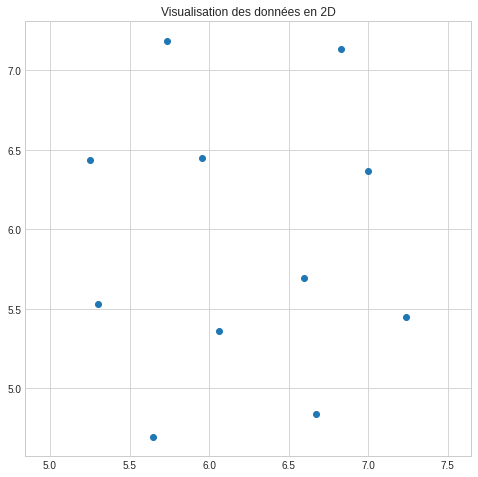

In [90]:
plt.figure(figsize=(8, 8))
plt.title('Visualisation des données en 2D')
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

**Visualisations des données**

In [91]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

In [92]:
labels = []
for c, xs in U.items():
    for x in xs:
        labels.append([x, c])
labels = np.array(labels)
labels = labels[np.argsort(labels[:, 0])]
labels = labels[:, 1]
labels

array([ 6,  0, 10, ..., 10, 10, 10])

In [93]:
plt.figure(figsize=(8, 8))
plt.title('Visualisation des données en 2D')
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

**Evaluation des performances**

Evaluons les performances de notre partition avec son index de Dunn.

In [94]:
print('Index de Dunn de la partition :', clust.index_dunn(X, U))

Index de Dunn de la partition : 0.02691304729850933


#### Evaluation des différentes valeurs de k

Faisons varier k et évaluons les différentes partitions en fonction de leur index de dunn

In [95]:
K = np.arange(1, 12)
dunn = []
for k in K:
    C, U = clust.kmoyennes(k, X, eps=0.05, iter_max=100, verbose=False)
    dunn.append(clust.index_dunn(X, U))

In [96]:
plt.figure(figsize=(8, 6))
plt.title('Index de Dunn - K-Moyennes')
plt.plot(K, dunn)
plt.xlabel('K')
plt.ylabel('Index')
plt.show()